# Crops Production data from all over the world

The following dataset is collected from http://www.fao.org/faostat/en/#data/QC 

The data explains the following terms
1. Area: Country
2. Item: specific crop
3. Unit: quantity
 1. Area harvested (ha)
 2. Production (tonnes)
 3. Yield (hg/ha)
4. year: from 1961-2018

# Needed outcomes of Analysis

 1. Handling the missing data
 2. suggesting a perfect fit model
 3. Forecasting the Production for future needs

#Importing necessary libraries

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#listing out the varioud files in the directory
import os
for entry in os.scandir('.'):
    if entry.is_file():
        print(entry.name)

data.csv
FAO.ipynb
README.md


In [113]:
#importing the data
data = pd.read_csv('data.csv')

In [114]:
#informartion about data, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50889 entries, 0 to 50888
Data columns (total 62 columns):
Area       50889 non-null object
Item       50889 non-null object
Element    50889 non-null object
Unit       50889 non-null object
1961       34403 non-null float64
1962       34436 non-null float64
1963       34431 non-null float64
1964       34458 non-null float64
1965       34449 non-null float64
1966       34605 non-null float64
1967       34633 non-null float64
1968       34718 non-null float64
1969       34750 non-null float64
1970       34858 non-null float64
1971       34932 non-null float64
1972       34974 non-null float64
1973       34986 non-null float64
1974       35047 non-null float64
1975       35215 non-null float64
1976       35298 non-null float64
1977       35489 non-null float64
1978       35548 non-null float64
1979       35719 non-null float64
1980       36022 non-null float64
1981       36146 non-null float64
1982       36267 non-null float64
1983       

In [115]:
#first 5 rows of the data
data.head()

,Area,Item,Element,Unit,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,"Almonds, with shell",Area harvested,ha,NaN,NaN,NaN,NaN,NaN,NaN,...,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0
1,Afghanistan,"Almonds, with shell",Yield,hg/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0
2,Afghanistan,"Almonds, with shell",Production,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
3,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,ha,NaN,NaN,NaN,NaN,NaN,NaN,...,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0
4,Afghanistan,"Anise, badian, fennel, coriander",Yield,hg/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0


In [112]:
#obtaining the number of null values for each column
null_values = data.isna().sum()
null_values

Area          51
Item          51
Element       51
Unit          51
1961       16537
1962       16504
1963       16509
1964       16482
1965       16491
1966       16335
1967       16307
1968       16222
1969       16190
1970       16082
1971       16008
1972       15966
1973       15954
1974       15893
1975       15725
1976       15642
1977       15451
1978       15392
1979       15221
1980       14918
1981       14794
1982       14673
1983       14588
1984       14488
1985       12724
1986       12528
           ...  
1989       11984
1990       10525
1991       10286
1992        6749
1993        6481
1994        6188
1995        6005
1996        5906
1997        5698
1998        5523
1999        5271
2000        4858
2001        4763
2002        4700
2003        4392
2004        4192
2005        4124
2006        3936
2007        3858
2008        3819
2009        3801
2010        3721
2011        3705
2012        3632
2013        3629
2014        3609
2015        5384
2016        53

In [116]:
#percentage of null values for each variable
percentage_null_vales = (null_values/data.shape[0])*100
print(percentage_null_vales)

Area        0.100218
Item        0.100218
Element     0.100218
Unit        0.100218
1961       32.496217
1962       32.431370
1963       32.441196
1964       32.388139
1965       32.405824
1966       32.099275
1967       32.044253
1968       31.877223
1969       31.814341
1970       31.602114
1971       31.456700
1972       31.374167
1973       31.350587
1974       31.230718
1975       30.900588
1976       30.737487
1977       30.362161
1978       30.246222
1979       29.910197
1980       29.314783
1981       29.071116
1982       28.833343
1983       28.666313
1984       28.469807
1985       25.003439
1986       24.618287
             ...    
1989       23.549294
1990       20.682269
1991       20.212620
1992       13.262198
1993       12.735562
1994       12.159799
1995       11.800193
1996       11.605652
1997       11.196919
1998       10.853033
1999       10.357838
2000        9.546267
2001        9.359587
2002        9.235788
2003        8.630549
2004        8.237537
2005        8

In [8]:
#checking for the minimum and maximum percentage of null values
print("maximum null values %: {}".format(max(percentage_null_vales)))
print("maximum null values %: {}".format(min(percentage_null_vales[4: 64])))

maximum null values %: 32.517496187981386
maximum null values %: 7.334714782812683


<BarContainer object of 62 artists>

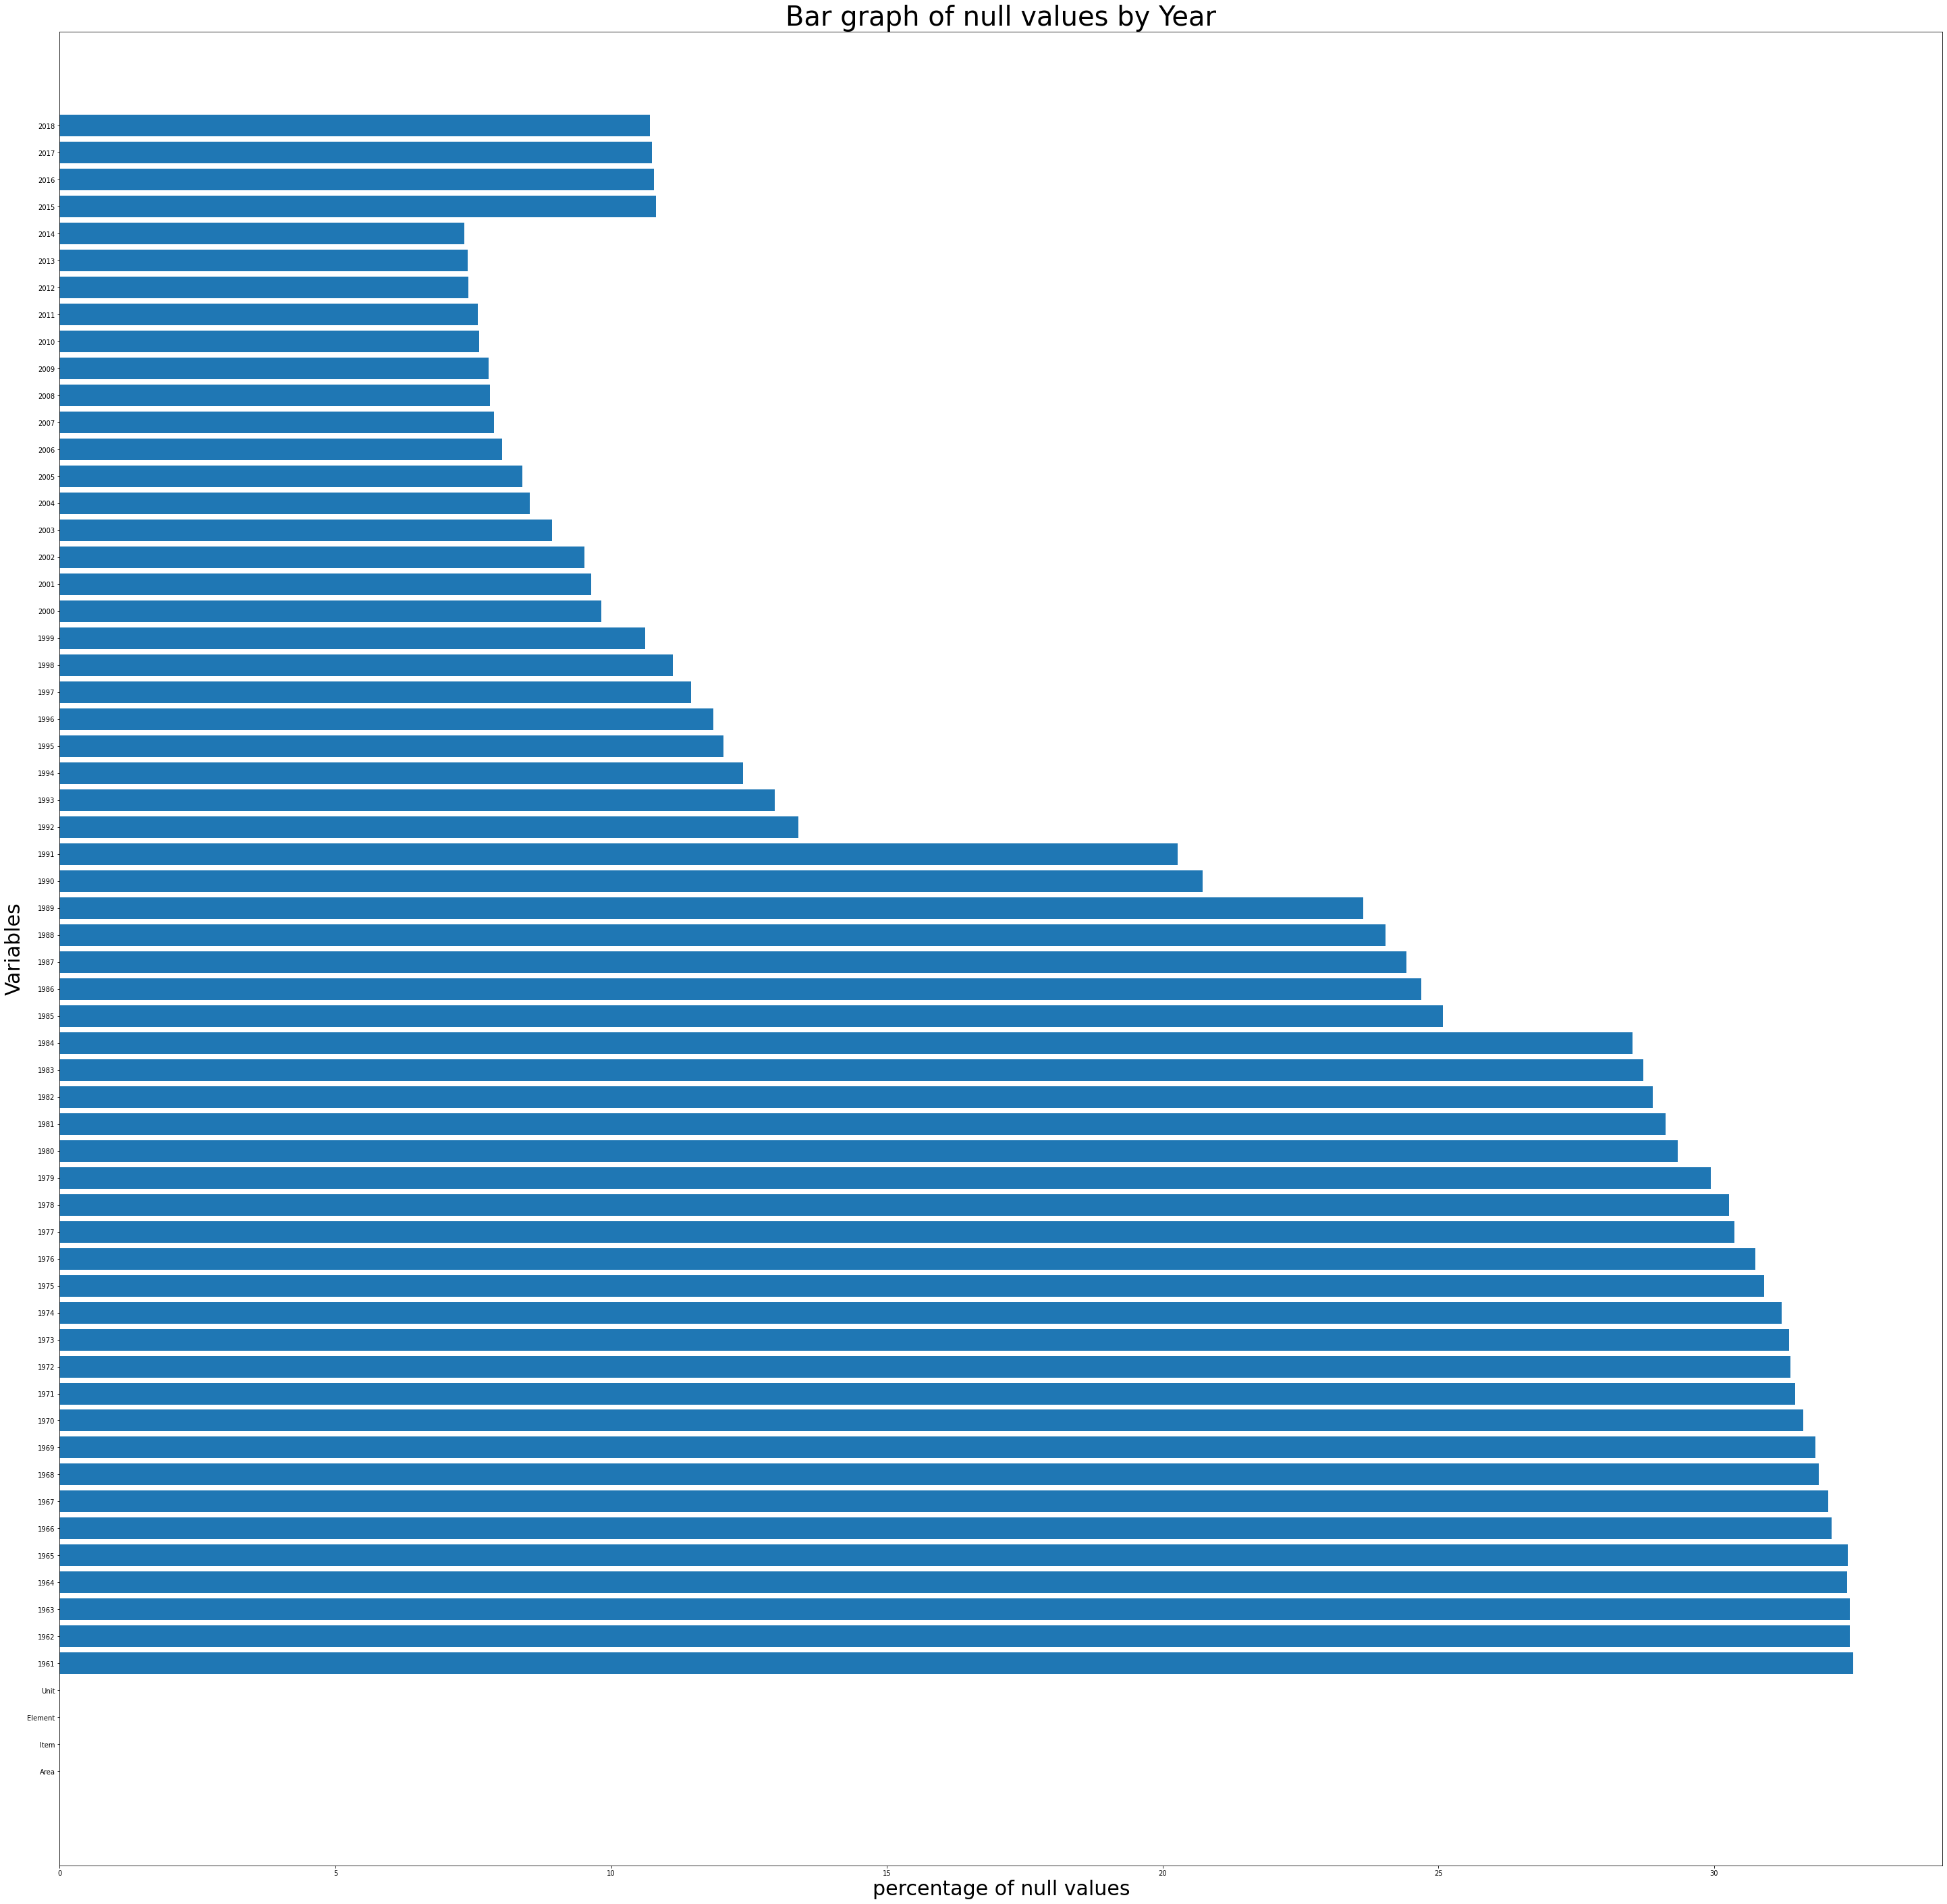

In [95]:
#exploratory graph for variavles vs percentage_null_vales
fig = plt.figure(1, figsize=(50,50))
plt.title("Bar graph of null values by Year", fontsize=40)
plt.xlabel('percentage of null values', fontsize=30)
plt.ylabel('Variables', fontsize=30)
plt.barh(data.columns, percentage_null_vales)

In [10]:
#Unique crops grwon across the world
data['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Cotton lint',
       'Cottonseed', 'Figs', 'Fruit, citrus nes', 'Fruit, fresh nes',
       'Fruit, stone nes', 'Grapes', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Millet', 'Nuts nes', 'Olives',
       'Onions, dry', 'Oranges', 'Peaches and nectarines', 'Pears',
       'Pistachios', 'Plums and sloes', 'Potatoes', 'Pulses nes',
       'Rice, paddy', 'Seed cotton', 'Sesame seed', 'Spices nes',
       'Sugar beet', 'Sugar cane', 'Sunflower seed',
       'Vegetables, fresh nes', 'Walnuts, with shell', 'Watermelons',
       'Wheat', 'Cereals (Rice Milled Eqv)', 'Cereals, Total',
       'Citrus Fruit, Total', 'Coarse Grain, Total',
       'Fibre Crops Primary', 'Fruit Primary', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Treenuts, Total',
       'Vegetables Primary', 'Be

In [117]:
#filtreing the data with major crops like Rice-paddy, Wheat, Soybeans, Sugarcane, Maize. 
data_filter=data.loc[data['Item'].isin(['Rice, paddy', 'Wheat', 'Soybeans', 'Sugarcane', 'Maize'])]
null = data_filter.isnull().sum()
null_per = (null/data_filter.shape[0])*100
null_per

Area        0.000000
Item        0.000000
Element     0.000000
Unit        0.000000
1961       21.535181
1962       21.588486
1963       21.588486
1964       21.695096
1965       21.695096
1966       21.321962
1967       21.108742
1968       20.948827
1969       20.628998
1970       20.095949
1971       19.936034
1972       19.456290
1973       18.816631
1974       18.816631
1975       18.336887
1976       17.857143
1977       17.857143
1978       17.697228
1979       17.697228
1980       17.377399
1981       17.217484
1982       17.057569
1983       16.897655
1984       16.897655
1985       16.311301
1986       15.831557
             ...    
1989       14.925373
1990       14.285714
1991       14.019190
1992        4.264392
1993        2.185501
1994        2.025586
1995        1.705757
1996        1.759062
1997        1.652452
1998        1.599147
1999        1.599147
2000        0.799574
2001        0.639659
2002        0.746269
2003        0.639659
2004        0.586354
2005        0

In [118]:
data_filter_t = data_filter.T
null_values = data_filter_t.isnull().sum()
null_per = (null_values/data_filter_t.shape[0])*100

As missing data before 1992 is more than 10%, lest avoid as. Because the simple impution for handling missing data best works for >10% missing data

In [119]:
data_filter = data_filter.drop(['1961', '1962', '1963', '1964','1965', '1966', '1967', '1968', '1969', '1970',
                                '1971', '1972', '1973','1974', '1975', '1976', '1977', '1978', '1979', '1980', 
                                '1981', '1982','1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
                                '1991',], axis=1)
data_filter.head()

,Area,Item,Element,Unit,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
38,Afghanistan,Maize,Area harvested,ha,200000.0,280000.0,300000.0,320000.0,220000.0,200000.0,...,140000.0,183000.0,183000.0,141000.0,142000.0,127000.0,147273.0,151900.0,134225.0,72433.0
39,Afghanistan,Maize,Yield,hg/ha,15000.0,16786.0,16667.0,16563.0,16364.0,15000.0,...,21429.0,16448.0,16400.0,21986.0,21972.0,24882.0,21457.0,20517.0,12957.0,14727.0
40,Afghanistan,Maize,Production,tonnes,300000.0,470000.0,500000.0,530000.0,360000.0,300000.0,...,300000.0,301000.0,300120.0,310000.0,312000.0,316000.0,316000.0,311646.0,173912.0,106670.0
77,Afghanistan,"Rice, paddy",Area harvested,ha,175000.0,175000.0,180000.0,170000.0,175000.0,180000.0,...,200000.0,208000.0,210000.0,205000.0,205000.0,220000.0,164000.0,119000.0,109452.0,117539.0
78,Afghanistan,"Rice, paddy",Yield,hg/ha,17143.0,17143.0,19000.0,22941.0,19429.0,22222.0,...,32250.0,32308.0,32000.0,24390.0,24980.0,24409.0,25000.0,29963.0,30919.0,29963.0


In [165]:
#data filtering according to production, yield and area harvested
data_production = data_filter.loc[data_filter['Element'].isin(['Production'])]
data_yield = data_filter.loc[data_filter['Element'].isin(['Yield'])]
data_area_harvested = data_filter.loc[data_filter['Element'].isin(['Area harvested'])]

#removing unwanted row from above filtered data i.e 'Element', 'Unit'
data_production = data_production.drop(['Unit', 'Element'], axis=1)
data_yield = data_yield.drop(['Unit', 'Element'], axis=1)
data_area_harvested = data_area_harvested.drop(['Unit', 'Element'], axis=1)

#further filtering the data based on crops = 'Rice, paddy', 'Wheat', 'Soybeans', 'Sugarcane', 'Maize', and droping the item row
data_production_rice = data_production.loc[data_production['Item'].isin(['Rice, paddy'])].drop(['Item'], axis=1)
data_production_wheat = data_production.loc[data_production['Item'].isin(['Wheat'])].drop(['Item'], axis=1)
data_production_soyabean = data_production.loc[data_production['Item'].isin(['Soyabeans'])].drop(['Item'], axis=1)
data_production_sugarcane = data_production.loc[data_production['Item'].isin(['Sugarcane'])].drop(['Item'], axis=1)
data_production_maize = data_production.loc[data_production['Item'].isin(['Maize'])].drop(['Item'], axis=1)

data_yield_rice = data_yield.loc[data_yield['Item'].isin(['Rice, paddy'])].drop(['Item'], axis=1)
data_yield_wheat = data_yield.loc[data_yield['Item'].isin(['Wheat'])].drop(['Item'], axis=1)
data_yield_soyabean = data_yield.loc[data_yield['Item'].isin(['Soyabeans'])].drop(['Item'], axis=1)
data_yield_sugarcane = data_yield.loc[data_yield['Item'].isin(['Sugarcane'])].drop(['Item'], axis=1)
data_yield_maize = data_yield.loc[data_yield['Item'].isin(['Maize'])].drop(['Item'], axis=1)

data_area_harvested_rice = data_area_harvested.loc[data_area_harvested['Item'].isin(['Rice, paddy'])].drop(['Item'], axis=1)
data_area_harvested_wheat = data_area_harvested.loc[data_area_harvested['Item'].isin(['Wheat'])].drop(['Item'], axis=1)
data_area_harvested_soyabean = data_area_harvested.loc[data_area_harvested['Item'].isin(['Soyabeans'])].drop(['Item'], axis=1)
data_area_harvested_sugarcane = data_area_harvested.loc[data_area_harvested['Item'].isin(['Sugarcane'])].drop(['Item'], axis=1)
data_area_harvested_maize = data_area_harvested.loc[data_area_harvested['Item'].isin(['Maize'])].drop(['Item'], axis=1)

data_yield_rice.head()

,Area,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
78,Afghanistan,17143.0,17143.0,19000.0,22941.0,19429.0,22222.0,25000.0,20000.0,20000.0,...,32250.0,32308.0,32000.0,24390.0,24980.0,24409.0,25000.0,29963.0,30919.0,29963.0
504,Algeria,24739.0,23121.0,21387.0,19615.0,17881.0,15000.0,15032.0,13983.0,13101.0,...,14615.0,15320.0,16089.0,16667.0,17778.0,17778.0,18281.0,19483.0,20179.0,20871.0
706,Angola,9142.0,8000.0,8750.0,14615.0,17500.0,20000.0,20000.0,14235.0,13454.0,...,6028.0,7403.0,8914.0,7703.0,12744.0,14064.0,15068.0,8062.0,9572.0,7175.0
1042,Argentina,52075.0,43559.0,42989.0,50306.0,51031.0,53703.0,47762.0,57337.0,47798.0,...,68842.0,57646.0,67901.0,66617.0,67187.0,65042.0,66989.0,67632.0,65083.0,69030.0
1498,Australia,88346.0,76400.0,81537.0,88003.0,63540.0,83263.0,94256.0,91615.0,82573.0,...,84609.0,103895.0,95441.0,89098.0,102177.0,106827.0,99103.0,102889.0,98208.0,103860.0


In [214]:
data_production_rice.reset_index(drop=True, inplace=True)
data_production_rice = data_production_rice.rename(columns={'Area':' '})
df = data_production_rice.T
df.columns = df.iloc[0]
df = df[1:]
df = df.reset_index().set_index('index', drop=False)
df = df.rename(columns={'index':'Year'})
df = df.reset_index(drop = True)

In [215]:
max(df.isnull().sum())

7

In [216]:
df.iloc[:, 91:102]

,Russian Federation,Rwanda,Senegal,Sierra Leone,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan (former),Suriname
0,753630,16100,177346,478515,2596,15000,3051,552600,2.3397e+06,1200,261080
1,687523,13200,193374,486300,2604,5000,3052,323093,2.57e+06,1500,216890
2,523232,4500,162228,405200,2611,1650,3054,407600,2.68369e+06,1650,217985
3,461920,2300,155152,355500,2619,2000,3055,329500,2.80989e+06,1200,216005
4,388976,6596,148780,391700,2570,2888,3056,734000,2.06152e+06,2000,228650
5,328072,9805,173702,411300,1932,2809,3058,775588,2.23937e+06,2000,213055
6,412166,7935,123519,328310,1300,2000,3029,796300,2.69234e+06,2000,188410
7,443394,8919,364000,247235,3240,2000,2900,845100,2.8571e+06,11000,180295
8,584312,11654,202293,199134,4524,2000,3000,827051,2.8599e+06,8000,163655
9,495536,15610,206989,300000,2083,4000,3200,876148,2.69508e+06,11000,191315


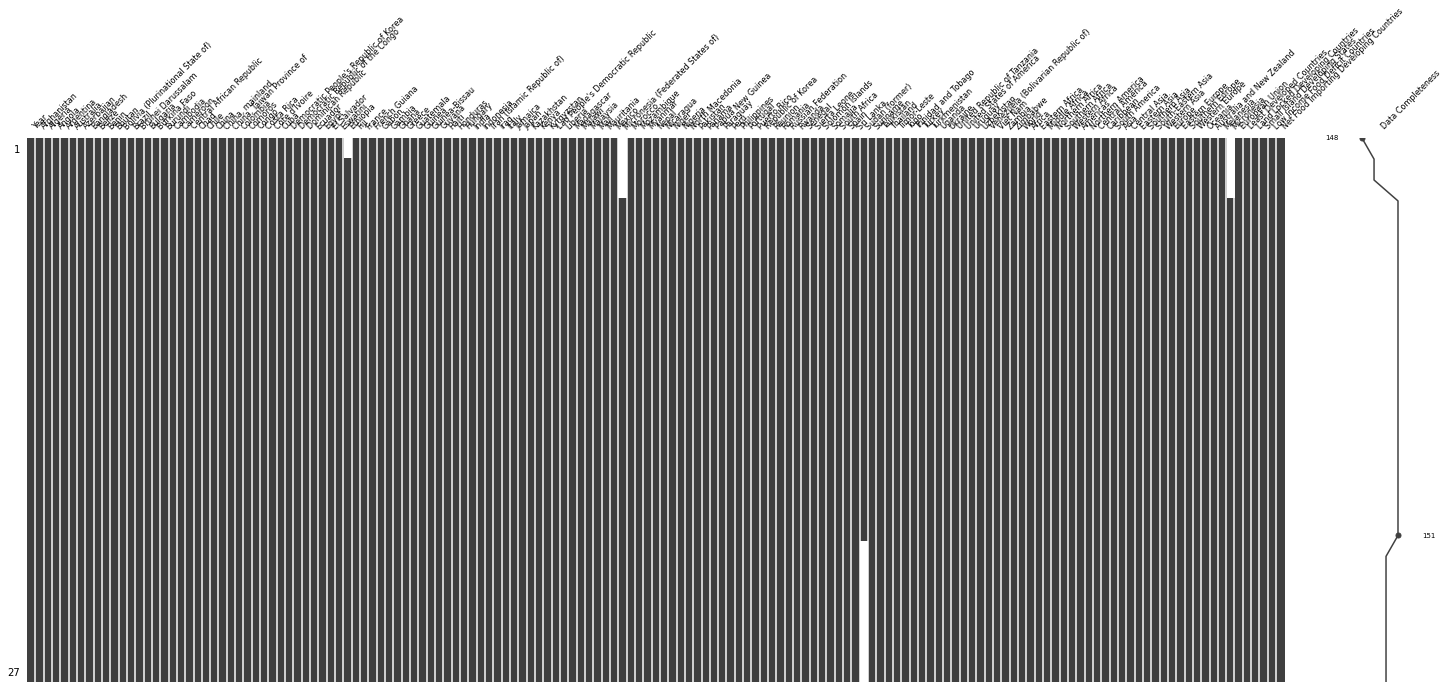

In [217]:
import missingno as msno
msno.matrix(df, filter='top',fontsize=8, labels=True)

In [218]:
df = df.replace('np.nan', 0)

In [219]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
df2 = imputer.fit_transform(df)
df2

array([[1.99200000e+03, 3.00000000e+05, 1.41000000e+03, ...,
        1.86221500e+06, 1.73009563e+08, 6.88760500e+07],
       [1.99300000e+03, 3.00000000e+05, 1.29000000e+03, ...,
        1.53763900e+06, 1.86917011e+08, 7.33555000e+07],
       [1.99400000e+03, 3.42000000e+05, 1.24400000e+03, ...,
        1.69972400e+06, 1.85629789e+08, 7.26840270e+07],
       ...,
       [2.01600000e+03, 3.56565000e+05, 3.04000000e+02, ...,
        2.36770300e+06, 2.85919573e+08, 1.39215487e+08],
       [2.01700000e+03, 3.38420000e+05, 3.13000000e+02, ...,
        2.42937900e+06, 2.94578501e+08, 1.42365782e+08],
       [2.01800000e+03, 3.52177000e+05, 3.13000000e+02, ...,
        2.82382800e+06, 3.02835299e+08, 1.47146281e+08]])

In [220]:
df3=pd.DataFrame(df2)
df3.iloc[:, 91:102]

,91,92,93,94,95,96,97,98,99,100,101
0,753630.0,16100.0,177346.0,478515.0,2596.0,15000.0,3051.0,552600.0,2339700.0,1200.0,261080.0
1,687523.0,13200.0,193374.0,486300.0,2604.0,5000.0,3052.0,323093.0,2570000.0,1500.0,216890.0
2,523232.0,4500.0,162228.0,405200.0,2611.0,1650.0,3054.0,407600.0,2683690.0,1650.0,217985.0
3,461920.0,2300.0,155152.0,355500.0,2619.0,2000.0,3055.0,329500.0,2809890.0,1200.0,216005.0
4,388976.0,6596.0,148780.0,391700.0,2570.0,2888.0,3056.0,734000.0,2061520.0,2000.0,228650.0
5,328072.0,9805.0,173702.0,411300.0,1932.0,2809.0,3058.0,775588.0,2239370.0,2000.0,213055.0
6,412166.0,7935.0,123519.0,328310.0,1300.0,2000.0,3029.0,796300.0,2692340.0,2000.0,188410.0
7,443394.0,8919.0,364000.0,247235.0,3240.0,2000.0,2900.0,845100.0,2857100.0,11000.0,180295.0
8,584312.0,11654.0,202293.0,199134.0,4524.0,2000.0,3000.0,827051.0,2859900.0,8000.0,163655.0
9,495536.0,15610.0,206989.0,300000.0,2083.0,4000.0,3200.0,876148.0,2695080.0,11000.0,191315.0


In [221]:
df = df.astype('float64')
df.head()

,Year,Afghanistan,Algeria,Angola,Argentina,Australia,Azerbaijan,Bangladesh,Belize,Benin,...,Oceania,Australia and New Zealand,Melanesia,Micronesia,European Union,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries
0,1992.0,300000.0,1410.0,4000.0,732700.0,1122000.0,622.0,27373000.0,6679.0,10390.0,...,1147695.0,1122000.0,25695.0,NaN,2236082.0,54698406.0,6659471.0,1862215.0,173009563.0,68876050.0
1,1993.0,300000.0,1290.0,4000.0,608300.0,955000.0,1124.0,26928000.0,9745.0,9955.0,...,980518.0,955000.0,25518.0,NaN,2037852.0,57414212.0,7296256.0,1537639.0,186917011.0,73355500.0
2,1994.0,342000.0,1244.0,21000.0,607600.0,1082000.0,1029.0,25124000.0,6359.0,13686.0,...,1103280.0,1082000.0,21280.0,NaN,2253098.0,56439264.0,6995111.0,1699724.0,185629789.0,72684027.0
3,1995.0,390000.0,1158.0,19000.0,926200.0,1137000.0,3807.0,26399000.0,9628.0,17219.0,...,1158855.0,1137000.0,21765.0,90.0,2156158.0,59333729.0,7293420.0,1963345.0,180653146.0,76499818.0
4,1996.0,340000.0,1073.0,14000.0,986000.0,951200.0,8070.0,28182000.0,12757.0,22259.0,...,971883.0,951200.0,20590.0,93.0,2711356.0,61529354.0,7747174.0,2180727.0,191134530.0,78897570.0


In [229]:
from impyute.imputation.cs import mice
df4 = mice(df.values)
df4=pd.DataFrame(df4)
df4.iloc[:, 91:102]

,91,92,93,94,95,96,97,98,99,100,101
0,753630.0,16100.0,177346.0,478515.0,2596.0,15000.0,3051.0,552600.0,2339700.0,1200.000000,261080.0
1,687523.0,13200.0,193374.0,486300.0,2604.0,5000.0,3052.0,323093.0,2570000.0,1500.000000,216890.0
2,523232.0,4500.0,162228.0,405200.0,2611.0,1650.0,3054.0,407600.0,2683690.0,1650.000000,217985.0
3,461920.0,2300.0,155152.0,355500.0,2619.0,2000.0,3055.0,329500.0,2809890.0,1200.000000,216005.0
4,388976.0,6596.0,148780.0,391700.0,2570.0,2888.0,3056.0,734000.0,2061520.0,2000.000000,228650.0
5,328072.0,9805.0,173702.0,411300.0,1932.0,2809.0,3058.0,775588.0,2239370.0,2000.000000,213055.0
6,412166.0,7935.0,123519.0,328310.0,1300.0,2000.0,3029.0,796300.0,2692340.0,2000.000000,188410.0
7,443394.0,8919.0,364000.0,247235.0,3240.0,2000.0,2900.0,845100.0,2857100.0,11000.000000,180295.0
8,584312.0,11654.0,202293.0,199134.0,4524.0,2000.0,3000.0,827051.0,2859900.0,8000.000000,163655.0
9,495536.0,15610.0,206989.0,300000.0,2083.0,4000.0,3200.0,876148.0,2695080.0,11000.000000,191315.0


In [236]:
df4.columns = df.columns
df4['Year'] = pd.to_datetime(df4['Year'], format='%y')
df4.iloc[:, 91:102]

,Russian Federation,Rwanda,Senegal,Sierra Leone,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan (former),Suriname
0,753630.0,16100.0,177346.0,478515.0,2596.0,15000.0,3051.0,552600.0,2339700.0,1200.000000,261080.0
1,687523.0,13200.0,193374.0,486300.0,2604.0,5000.0,3052.0,323093.0,2570000.0,1500.000000,216890.0
2,523232.0,4500.0,162228.0,405200.0,2611.0,1650.0,3054.0,407600.0,2683690.0,1650.000000,217985.0
3,461920.0,2300.0,155152.0,355500.0,2619.0,2000.0,3055.0,329500.0,2809890.0,1200.000000,216005.0
4,388976.0,6596.0,148780.0,391700.0,2570.0,2888.0,3056.0,734000.0,2061520.0,2000.000000,228650.0
5,328072.0,9805.0,173702.0,411300.0,1932.0,2809.0,3058.0,775588.0,2239370.0,2000.000000,213055.0
6,412166.0,7935.0,123519.0,328310.0,1300.0,2000.0,3029.0,796300.0,2692340.0,2000.000000,188410.0
7,443394.0,8919.0,364000.0,247235.0,3240.0,2000.0,2900.0,845100.0,2857100.0,11000.000000,180295.0
8,584312.0,11654.0,202293.0,199134.0,4524.0,2000.0,3000.0,827051.0,2859900.0,8000.000000,163655.0
9,495536.0,15610.0,206989.0,300000.0,2083.0,4000.0,3200.0,876148.0,2695080.0,11000.000000,191315.0


In [238]:
df4.loc['total'] = df4.select_dtypes(pd.np.number).sum()

In [240]:
df4.tail()

,Year,Afghanistan,Algeria,Angola,Argentina,Australia,Azerbaijan,Bangladesh,Belize,Benin,...,Oceania,Australia and New Zealand,Melanesia,Micronesia,European Union,Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries
23,1970-01-01 00:00:00.000002015,410000.0,308.0,45322.0,1558100.0,690390.0,2834.0,5.180546e+07,12663.0,204310.0,...,700462.0,690390.0,9902.0,169.000000,3021546.0,1.134579e+08,15544703.0,2344792.0,2.822647e+08,1.396132e+08
24,1970-01-01 00:00:00.000002016,356565.0,304.0,61000.0,1404980.0,273942.0,5406.0,5.045287e+07,16203.0,281428.0,...,286339.0,273942.0,12219.0,178.000000,3068989.0,1.123896e+08,15634600.0,2367703.0,2.859196e+08,1.392155e+08
25,1970-01-01 00:00:00.000002017,338420.0,313.0,63000.0,1328340.0,807304.0,15916.0,5.414800e+07,18751.0,278718.0,...,820149.0,807304.0,12660.0,185.000000,3075081.0,1.169618e+08,16496998.0,2429379.0,2.945785e+08,1.423658e+08
26,1970-01-01 00:00:00.000002018,352177.0,313.0,56441.0,1367968.0,635113.0,11975.0,5.641732e+07,13375.0,459313.0,...,645929.0,635113.0,10638.0,177.000000,2895793.0,1.200051e+08,16047817.0,2823828.0,3.028353e+08,1.471463e+08
total,NaT,23546512.0,28160.0,1078224.0,62345638.0,44184194.0,432486.0,2.196740e+09,739078.0,6622158.0,...,45054648.0,44184194.0,864390.0,6636.278608,147704222.0,4.799727e+09,590013090.0,122648384.0,1.269965e+10,5.995719e+09
